# [CFA: Class-wise Calibrated Fair Adversarial Training<br />逐类校准的公平对抗训练](http://arxiv.org/abs/2303.14460)

In this paper, we are the first to theoretically and empirically investigate the preference of different classes for adversarial configurations, including perturbation margin, regularization, and weight averaging. Motivated by this, we further propose a Class-wise calibrated Fair Adversarial training framework, named CFA, which customizes specific training configurations for each class automatically.  
在本文中，我们首次从理论和实证上研究了不同类别对于对抗配置的偏好，包括扰动边界、正则化和权重平均。在此基础上，我们进一步提出了一种逐类校准的公平对抗训练框架，称为CFA，它可以自动为每个类别定制特定的训练配置。

### A Binary Classification Task<br />二分类任务

#### Data Distribution<br />数据分布

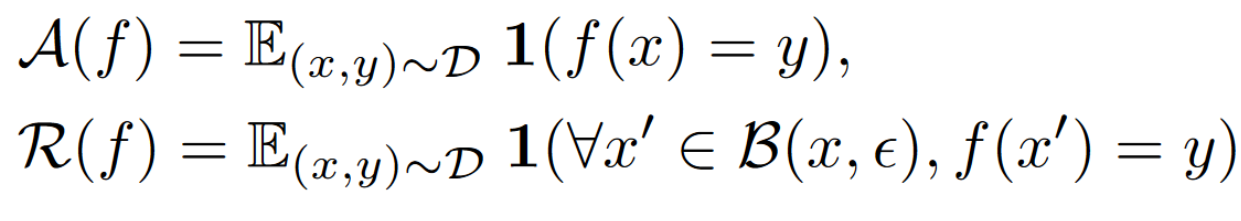

For input $x = (x_{1}, x_{2}, · · · , x_{d+1})$, let $x_{1} ∈ \{−1, +1\}$ be the robust feature, and $x_{2}, · · · , x_{d+1}$ be the non-robust features.  
对于输入$x = (x_{1}, x_{2}, · · · , x_{d+1})$，令$x_{1} ∈ \{−1, +1\}$为鲁棒特征，$x_{2}, · · · , x_{d+1}$为非鲁棒特征。

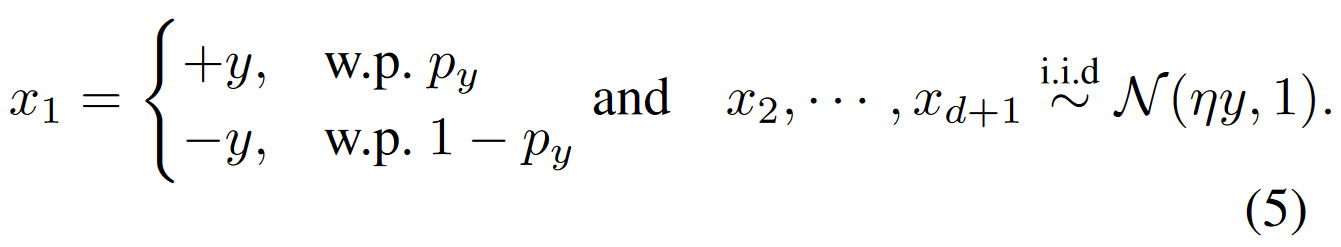

$η < 1/2$ is a small positive number.  
$η < 1/2$是一个小的正数。

$0.5 ≤ p < 1$

We set $p_{+1} > p_{−1}$ in our model. So $x_{1}$ is more reliable for class $y = +1$. For class $y = −1$, their classification depends more on the non-robust features $x_{2}, · · · , x_{d+1}$.  
我们在模型中设置$p_{+1} > p_{−1}$。因此，$x_{1}$对于类$y = +1$更可靠。对于类$y = −1$，它们的分类更多地取决于非鲁棒特征$x_{2}, · · · , x_{d+1}$。

#### Hypothesis Space<br />假设空间

$f(x) = sign(w_{1}x_{1}+w_{2}x_{2}+· · ·+w_{d+1}x_{d+1})$ and we assume $w_{1}, w_{2} \not= 0$, and $w_{2} = w_{3} = · · · = w_{d+1}$. Let $w = \frac{w_{1}}{w_{2}}$. So  
$f(x) = sign(w_{1}x_{1}+w_{2}x_{2}+· · ·+w_{d+1}x_{d+1})$，我们假设$w_{1}, w_{2} \not= 0$，且$w_{2} = w_{3} = · · · = w_{d+1}$。令$w = \frac{w_{1}}{w_{2}}$。所以

$$
f_{w}(x) = sign (x_{1} + \frac{x_{2}+...+x_{d+1}}{w})
$$

## Theoretical Insights<br />理论洞察

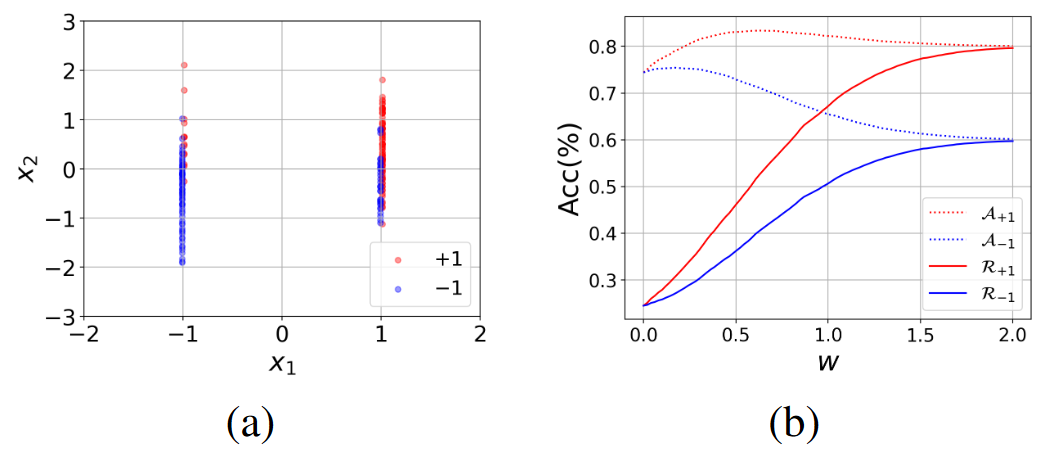

We can see that the robust feature $x_{1}$ of class $y = −1$ seems to be noisier than $y = +1$. Therefore, class $y = −1$ might be more difficult to learn.   
我们可以看到，类$y = −1$的鲁棒特征$x_{1}$似乎比$y = +1$更嘈杂。因此，类$y = −1$可能更难学习。

$w$ can be regarded as the strength of adversarial attack in adversarial training, since larger $w$ indicates the classifier $f_{w}$ bias less weight on non-robust features $w_{2}, · · · , w_{d+1}$ and pay more attention on robust feature $w_{1}$.  
$w$可以被看作是对抗训练中对抗攻击的强度，因为较大的$w$表示分类器$f_{w}$对非鲁棒特征$w_{2}, · · · , w_{d+1}$的权重较小，而对鲁棒特征$w_{1}$的关注较多。

We can see that as $w$ increases, the clean accuracy of $y = −1$ drops significantly faster than $y = +1$, but the robustness improves slower.  
我们可以看到，随着$w$的增加，$y = −1$的干净准确率下降的速度明显快于$y = +1$，但鲁棒性提高的速度较慢。

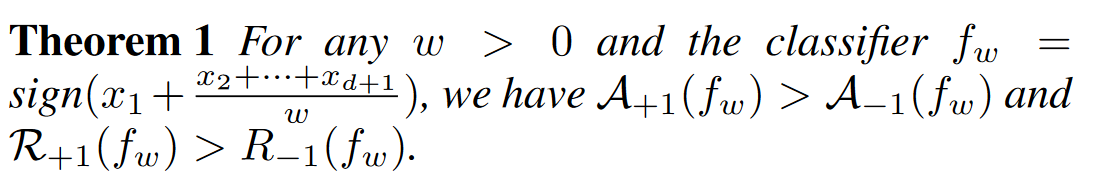

We formally distinct class $y = −1, +1$ as the hard and easy class. This reveals the potential reason why some classes are intrinsically difficult to learn in the adversarial setting, that is, their robust features are less reliable.  
我们正式将类$y = −1, +1$区分为难类和易类。这揭示了一些类在对抗设置中本质上难以学习的潜在原因，即它们的鲁棒特征不太可靠。

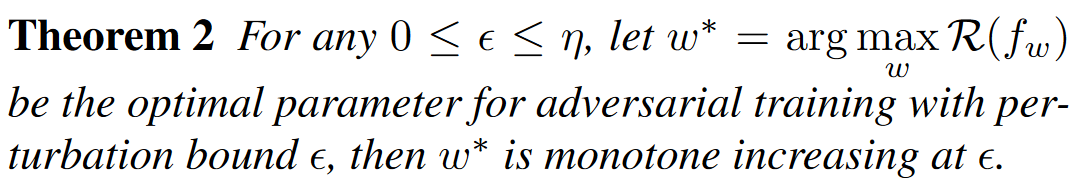

Theorem 2 bridges the gap between model parameter and attack strength in adversarial training. Next, we can implicitly investigate the influence of attack strength on class-wise robustness by analyzing the parameter $w$.  
定理2弥合了对抗训练中模型参数和攻击强度之间的差距。接下来，我们可以通过分析参数$w$来隐式地研究攻击强度对类别鲁棒性的影响。

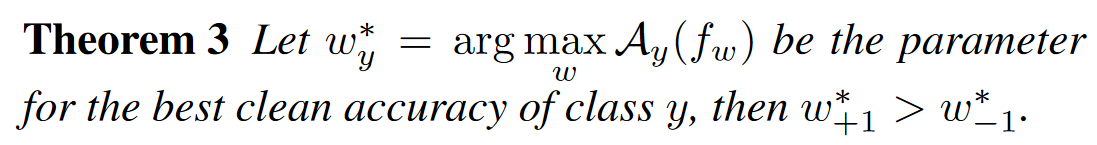

$A_{−1}(f_{w})$ starts dropping earlier than $A_{+1}(f_{w})$.  
$A_{−1}(f_{w})$开始下降的时间比$A_{+1}(f_{w})$早。

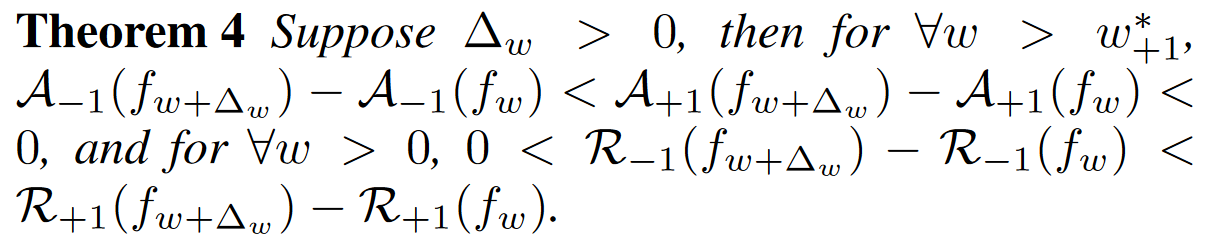

As the model further distracts its attention from its clean accuracy to robustness by increasing the parameter $w$, the hard class $y = −1$ losses more clean accuracy yet gains less robust accuracy.  
随着模型通过增加参数$w$进一步将注意力从干净准确率转移到鲁棒性，难类$y = −1$损失了更多的干净准确率，但获得了更少的鲁棒准确率。

## Observations on Class-wise Robustness<br />类别鲁棒性的观察

### Different Margins $\epsilon$<br />不同的边界$\epsilon$

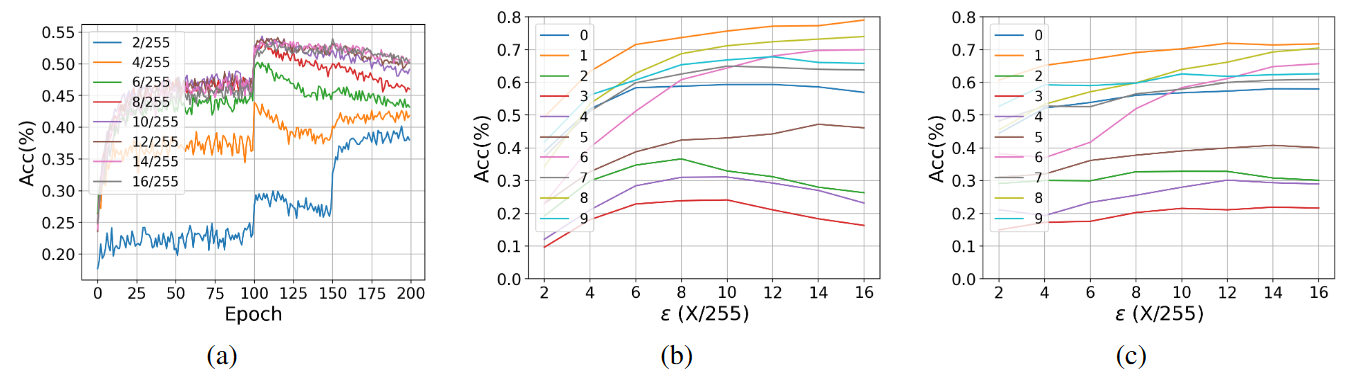

(a).The robustness is evaluated under PGD-10 attack bounded by $\epsilon_{0} = 8/255$, which is commonly used for robustness evaluation. Intuitively, using a larger margin can lead to better robustness.  
(a).鲁棒性是在$\epsilon_{0} = 8/255$的PGD-10攻击下评估的，这是常用的鲁棒性评估方法。直观地说，使用较大的边界可以导致更好的鲁棒性。

(b).For the easy classes which perform higher robustness, their robustness monotonously increase as $\epsilon$ enlarges from 2/255 to 16/255. By contrast, for the hard classes (especially class 2, 3, 4), their robustness drop when $\epsilon$ enlarges from 8/255.  
(b).对于表现较好的易类，当$\epsilon$从2/255增大到16/255时，它们的鲁棒性单调增加。相比之下，对于难类（特别是类2、3、4），当$\epsilon$从8/255增大时，它们的鲁棒性下降。

(c).However, for the last several checkpoints, we can see a consistent increase on class-wise robustness when the $\epsilon$ enlarges.  
(c).然而，对于最后几个检查点，我们可以看到当$\epsilon$增大时，类别鲁棒性保持一致增加。

Revisiting the overall robustness, we can summarize that the class-wise robustness is boosted mainly by reducing the robust over-fitting problem in the last checkpoint.  
重新审视整体的鲁棒性，我们可以总结出，类别鲁棒性主要是通过在最后一个检查点减少鲁棒过拟合问题来提高的。

In summary, larger perturbation is harmful to the hard classes in the best case, while can marginally improve the class-wise robustness in the later stage of training. For easy classes, larger perturbation is useful at whatever the best and last checkpoints. Therefore, a specific and proper perturbation margin is needed for each class.  
总之，在最好的情况下，较大的扰动对难类是有害的，而在训练后期，较大的扰动可以在一定程度上提高类别鲁棒性。对于易类，较大的扰动在最好和最后的检查点都是有用的。因此，每个类别都需要一个特定和适当的扰动边界。

### Different Regularizations $\beta$<br />不同的正则化$\beta$

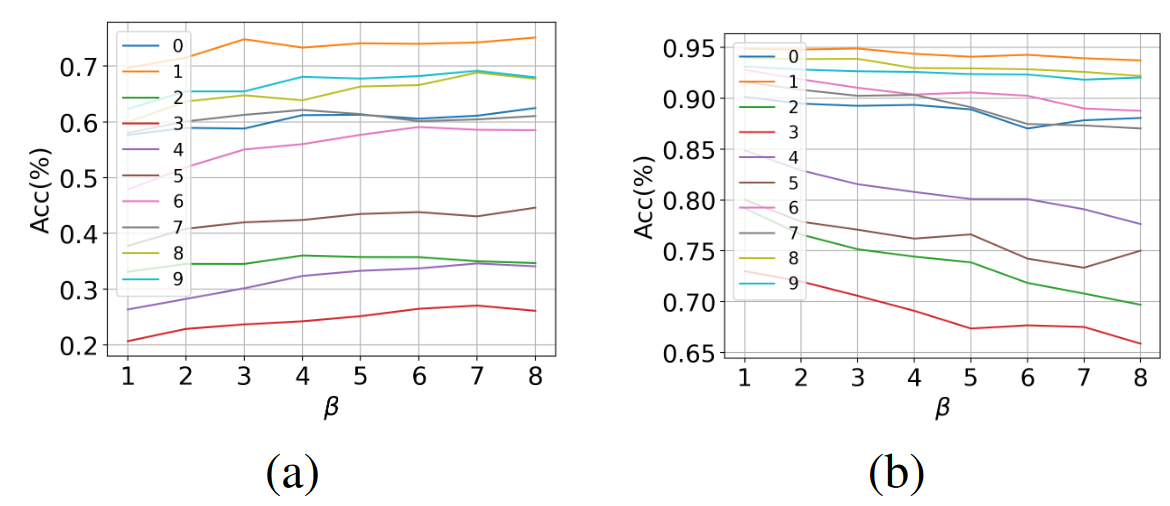

We can see that bias more weight on robustness (use larger β) cause different influences among classes. Specifically, for easy classes, improving β can improve their robustness at the cost of little clean accuracy reduction, while for hard classes (e.g., classes 2, 3, 4), improving β can only obtain limited robustness improvement but drop clean accuracy significantly.  
我们可以看到，偏向于鲁棒性（使用较大的β）会导致不同类别之间的不同影响。具体来说，对于易类，提高β可以在几乎不降低干净准确率的情况下提高它们的鲁棒性，而对于难类（例如类2、3、4），提高β只能获得有限的鲁棒性改进，但干净准确率显著下降。

We point out that there exists a proper $β_{y}$ for each class.  
我们指出，每个类别都存在一个适当的$β_{y}$。

### Fluctuation Effect<br />波动效应

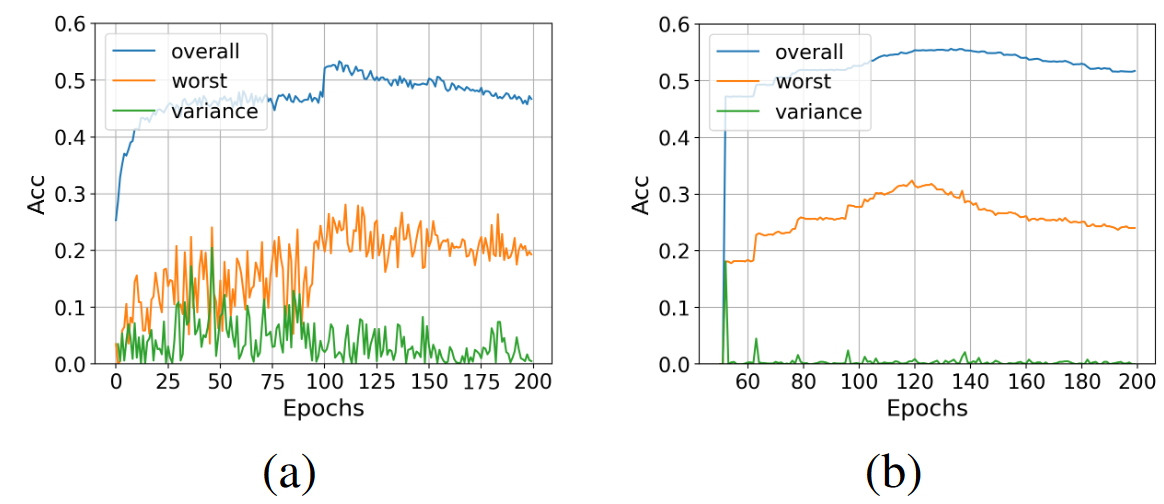

Particularly, many adjacent checkpoints between the 101 − 120-th epochs exhibit a nearly 10% difference in the worst class robustness, while changes in overall robustness are negligible (less than 1%). Therefore, previously widely used selecting the best checkpoint based on overall robustness may result in an extremely unfair model.  
特别地，101 − 120个epoch之间的许多相邻检查点在最差类别的鲁棒性上表现出近10%的差异，而整体鲁棒性的变化可以忽略不计（小于1%）。因此，以前广泛使用的基于整体鲁棒性选择最佳检查点的方法可能会导致一个极不公平的模型。

## Class-wise Calibrated Fair Adversarial Training<br />逐类校准的公平对抗训练

### Class-wise Calibrated Margin(CCM)<br />类校准边界

Suppose the $k$-th class achieved train robust accuracy $t_{k} ∈ [0, 1]$ in the last training epoch. In the next epoch,  
假设第$k$类在最后一个训练epoch中达到了训练鲁棒准确率$t_{k} ∈ [0, 1]$。在下一个epoch中，

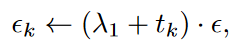

To avoid $\epsilon_{k}$ too small, we add a hyper-parameter $λ_{1}$ (called base perturbation budget) on all $t_{k}$.  
为了避免$\epsilon_{k}$太小，我们在所有$t_{k}$上添加一个超参数$λ_{1}$（称为基本扰动预算）。

### Class-wise Calibrated Regularization(CCR)<br />类校准正则化

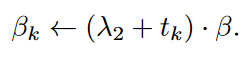

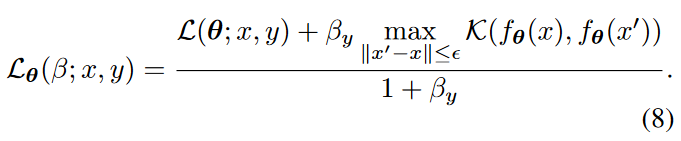

Note that simply replacing $\epsilon$ in (8) with $\epsilon_{k}$ can combine the calibrated margin with this calibrated regularization.  
注意，简单地用$\epsilon_{k}$替换(8)中的$\epsilon$可以将校准边界与校准正则化相结合。

### Fairness Aware Weight Average (FAWA)<br />公平感知权重平均

We set a threshold δ on the worst class robustness of the new checkpoint in the EMA process.  
我们在EMA过程中将最差类别鲁棒性的阈值δ设置为新检查点。

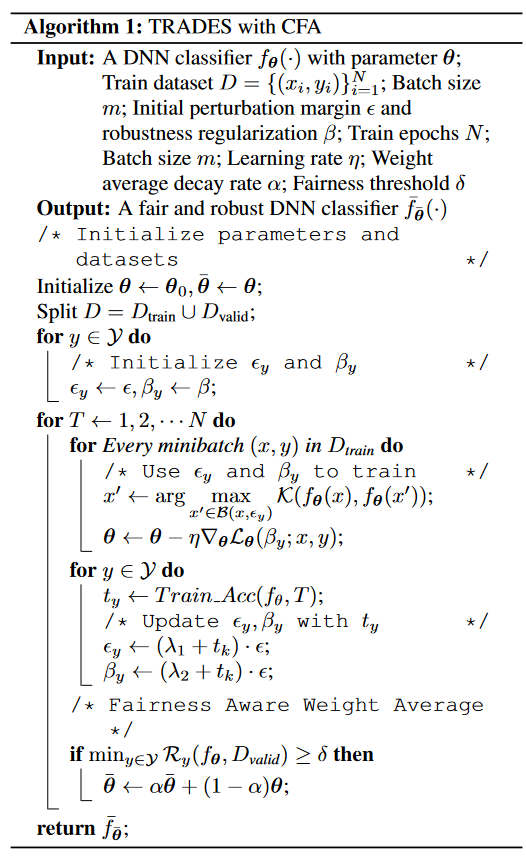


#### Comparison with Fair Robust Learning (FRL)<br />与公平鲁棒学习（FRL）的比较

Our approach aims to customize the proper margin **for each class**, which boosts the best performance.  
我们的方法旨在为**每个类别**定制适当的边界，从而提高最佳性能。

FRL improves robust fairness at the cost of **reducing overall robustness**, which could be seen as unfair to other classes. However, our CFA framework improves **both overall and worst class performance**.  
FRL提高了鲁棒公平性，但代价是**降低了整体鲁棒性**，这可能被视为对其他类别的不公平。然而，我们的CFA框架提高了**整体和最差类别的性能**。

FRL requires an initial robust model before fairness fine-tuning, resulting in **extra computational burden**.  
FRL需要一个鲁棒模型在公平微调之前，导致**额外的计算负担**。

Finally, the **fluctuation effect** is not considered in FRL.  
最后，FRL没有考虑**波动效应**。